In [1]:
import numpy as np

def ising_hamiltonian(spins, J, h):
    """
    Calculate the Hamiltonian of the 1D Ising model with periodic boundary conditions.

    Parameters:
    spins (np.array): Array of spins (+1 or -1).
    J (float): Interaction strength between neighboring spins.
    h (float): External magnetic field.

    Returns:
    float: The Hamiltonian of the given spin configuration.
    """
    N = len(spins)
    interaction_energy = -J * np.sum(spins * np.roll(spins, -1))
    magnetic_energy = -h * np.sum(spins)
    return interaction_energy + magnetic_energy

# Example usage
N = 10  # Number of spins
J = 1.0  # Interaction strength
h = 0.5  # External magnetic field

# Random initial spin configuration
spins = np.random.choice([-1, 1], size=N)

# Calculate the Hamiltonian
H = ising_hamiltonian(spins, J, h)
print("Spin configuration:", spins)
print("Hamiltonian:", H)


Spin configuration: [ 1  1 -1 -1 -1 -1  1  1 -1 -1]
Hamiltonian: -1.0


In [2]:
import numpy as np

def morse_potential(r, D_e, a, r_e):
    """
    Calculate the Morse potential for a given interatomic distance.

    Parameters:
    r (float or np.array): Interatomic distance.
    D_e (float): Well depth (dissociation energy).
    a (float): Width parameter of the potential well.
    r_e (float): Equilibrium bond length.

    Returns:
    float or np.array: Morse potential at distance r.
    """
    return D_e * (1 - np.exp(-a * (r - r_e)))**2


In [3]:
def ising_hamiltonian(spins, distances, D_e, a, r_e, h):
    """
    Calculate the Hamiltonian of the 1D Ising model with distance-dependent interactions.

    Parameters:
    spins (np.array): Array of spins (+1 or -1).
    distances (np.array): Array of interatomic distances.
    D_e (float): Well depth (dissociation energy).
    a (float): Width parameter of the potential well.
    r_e (float): Equilibrium bond length.
    h (float): External magnetic field.

    Returns:
    float: The Hamiltonian of the given spin configuration.
    """
    N = len(spins)
    J_values = morse_potential(distances, D_e, a, r_e)
    interaction_energy = -np.sum(J_values * spins * np.roll(spins, -1))
    magnetic_energy = -h * np.sum(spins)
    return interaction_energy + magnetic_energy


Spin configuration: [ 1 -1  1 -1  1  1 -1 -1 -1  1]
Interatomic distances: [0.9268347  0.87718089 1.10636276 1.15514168 0.84826009 1.090913
 1.11086807 1.13904143 0.98690806 1.05479855]
Hamiltonian: 0.01920861602513222


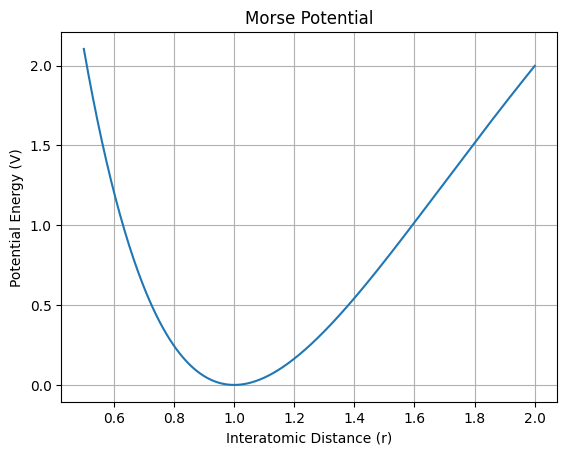

In [4]:
import matplotlib.pyplot as plt

# Parameters for the Morse potential
D_e = 5.0  # Well depth
a = 1.0    # Width parameter
r_e = 1.0  # Equilibrium bond length

# Parameters for the Ising model
N = 10  # Number of spins
h = 0.5  # External magnetic field

# Random initial spin configuration
spins = np.random.choice([-1, 1], size=N)

# Random interatomic distances around the equilibrium bond length
distances = np.random.normal(loc=r_e, scale=0.1, size=N)

# Calculate the Hamiltonian
H = ising_hamiltonian(spins, distances, D_e, a, r_e, h)
print("Spin configuration:", spins)
print("Interatomic distances:", distances)
print("Hamiltonian:", H)

# Plotting the Morse potential for reference
r = np.linspace(0.5, 2.0, 400)
V = morse_potential(r, D_e, a, r_e)

plt.plot(r, V)
plt.xlabel('Interatomic Distance (r)')
plt.ylabel('Potential Energy (V)')
plt.title('Morse Potential')
plt.grid(True)
plt.show()


In [32]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli  # Use QuantumExpr for expressions

# Parameters
J = 1  # Interaction strength
h = 1  # External magnetic field
N = 2  # Number of spins

# Define individual Pauli operators
pauli_x = Pauli("X")
pauli_y = Pauli("Y")
pauli_z = Pauli("Z")
pauli_i = Pauli("I")

# Define the Ising Hamiltonian
H_ising = -J * (pauli_z ^ pauli_z) - h * (pauli_x ^ pauli_i + pauli_i ^ pauli_x)

print("Ising Hamiltonian (QuantumExpr):\n", H_ising)


TypeError: unsupported operand type(s) for +: 'Pauli' and 'Pauli'

ImportError: cannot import name 'Aer' from 'qiskit' (/opt/homebrew/lib/python3.11/site-packages/qiskit/__init__.py)